### Using the dataset to train a model

In [1]:
import tensorflow.keras as kr

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# neural neworks
import tensorflow.keras as kr

In [2]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

In [3]:
data = pd.read_csv('power_production.csv')
data

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


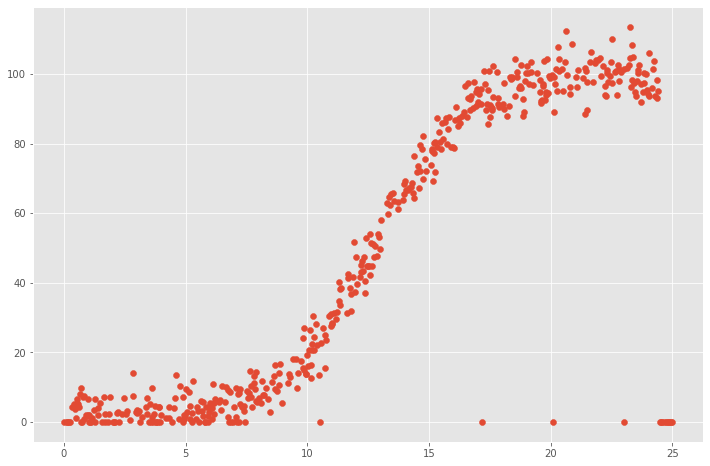

In [4]:
power_data = np.genfromtxt("power_production.csv", delimiter=",", names=["x", "y"])
fig=plt.figure(figsize=(12,8))  # adapted from https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger
plt.scatter(power_data['x'], power_data['y'])


The curve produced by plotting wind-speed against power output is s-shaped. This suggests that power output is quite small at low wind speeds, climbs sharply after a certain speed and then much more slowly before it reaches a maximum. The characteristic shape of the graph is explained by [this article](https://now.tufts.edu/articles/how-do-windmills-create-electricity) on how windmills create energy. It seems that if the turbine is moving quite slowly, electricity is not creatyed. Energy starts to be created at what is known as the cut-in speed/ After the cut-in point energy is created at a fast rate but this rate starts to slow until it reaches its maximum rated wins speed. SAbove this point, the power output remains constant. We can see this as the top of the s-shape in the graph. Wind turbines also have a cut-out speed, at which a brake stops the winds rotation. I wonder if some of the zero value power outputs we see can be explained by problems caused by high wind speed.
[https://now.tufts.edu/articles/how-do-windmills-create-electricity]

## S-shaped curves

I'm struck by the shape of the curve produce by the relationship between wind speed and power output, the related sigmoid function and the mechanism of firing neurons as described in the lectures on neural networks. The way that neurons need a build up of signals before firing strikes me as similar to the way the wind turbines have a cut-in speed, after which they start to produce electricity. The sigmoid function is described in the lectures as like an on/off switch. Is there a relationship between the activation function and thr function needed to describe the power output from wind turbines?
[https://en.wikipedia.org/wiki/Sigmoid_function]

In [5]:
train = pd.DataFrame()
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]
train_x = train.iloc[:,0]
train_x
train_y = train.iloc[:,1]
train_y
test_x = test.iloc[:,0]
test_x
test_y = test.iloc[:,1]
test_y
# https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas

3        0.000
12       4.220
13       7.974
22       2.064
25       2.085
        ...   
474     96.986
477    100.322
480     94.270
493      0.000
494      0.000
Name: power, Length: 80, dtype: float64

In [6]:
# create a new neural network
m = kr.models.Sequential()

# Add a single neuron in a single layer, initialised with weight 1 and bias 0.
# dense: everything in current layer connected to every thing in previous layer
# 1: number of neurons in the layer
# input_dim=1  number of dimensions in input is 1 (1 input)
# linear activation function
m.add(kr.layers.Dense(1, input_dim=1, activation="linear", kernel_initializer='ones', bias_initializer='zeros'))

# Compile the model.
# bog standard to optimize - optimizer="sgd"
# loss="mean_squared_error" ... cost function
m.compile(loss="mean_squared_error", optimizer="sgd")

In [7]:
# Create some input values.
x = np.arange(-10.0, 10.1, 1.0)

# Run each x value through the neural network.
y = m.predict(x)

In [8]:
# Have a look at x.
x

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [9]:
y

array([[-10.],
       [ -9.],
       [ -8.],
       [ -7.],
       [ -6.],
       [ -5.],
       [ -4.],
       [ -3.],
       [ -2.],
       [ -1.],
       [  0.],
       [  1.],
       [  2.],
       [  3.],
       [  4.],
       [  5.],
       [  6.],
       [  7.],
       [  8.],
       [  9.],
       [ 10.]], dtype=float32)